### An example showing the plot_learning_curve method used by a scikit-learn classifier

In this example, we'll be plotting a `learning_curve` to describe the classifier model performance
using the **breast_cancer**, **iris** or **digits** dataset from scikit-learn.
- `LogisticRegression`
- `RandomForestClassifier`

Here, we'll be using the `scikitplot.estimators.plot_learning_curve` method.

In [1]:
from sklearn.datasets import (
    make_classification,
    load_breast_cancer as data_2_classes,
    load_iris as data_3_classes,
    load_digits as data_10_classes,
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
import numpy as np; np.random.seed(0)
# importing pylab or pyplot
import matplotlib.pyplot as plt

# Import scikit-plot
import scikitplot as skplt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
# Load the data
X, y = data_10_classes(return_X_y=True, as_frame=False)

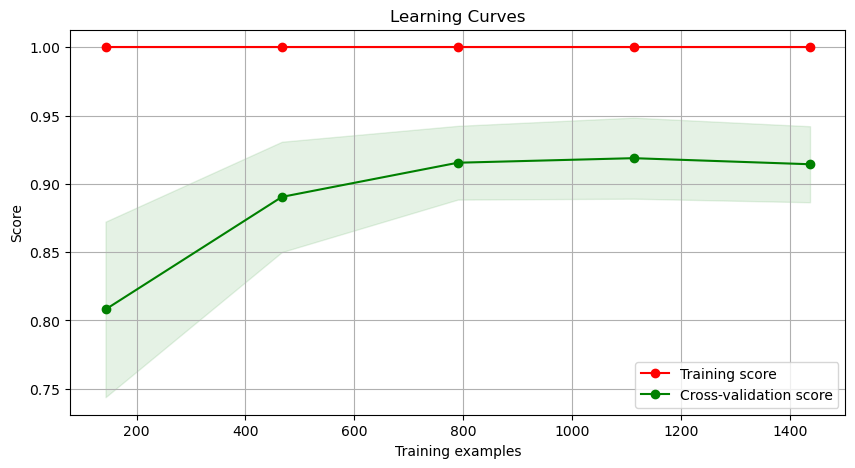

In [3]:
# Create an instance of the LogisticRegression
model = LogisticRegression(max_iter=int(1e5), random_state=0)

# Plot!
ax = skplt.estimators.plot_learning_curve(
    model, X, y
);